# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Abrir archivo
df = pd.read_csv('Base Airbnb NY.csv')
df.head()
len(df)
df.describe()

# Elimino duplicados
data_sin_duplicados = data.drop_duplicates()
# Mostrar duplicados
len(data_sin_duplicados)
df_sin_duplicados.head() # data frame sin duplicados
df_sin_duplicados.head() #veo filas de df
len(df_sin_duplicados)

# Elimino columnas que no me parecen de interes.
columnas_a_eliminar = ['name', 'host_name', 'id', 'host_id','neigbourhood_group','last_review'] 
data_sin_columnas = data_sin_duplicados.drop(columns=columnas_a_eliminar) 

#Outliers
#Defino columnas cuantis para analizar outliers
columnas_cuantitativas = ['latitude', 'longitude', 'price', 
                          'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                          'calculated_host_listings_count', 'availability_365']

# Calcular mediana y IQR para cada columna
Q1 = data_dummies[columnas_cuantitativas].quantile(0.25)
Q3 = data_dummies[columnas_cuantitativas].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR #limites
limite_superior = Q3 + 1.5 * IQR

# Filtrar datos sin outliers
data_sin_outliers = data_dummies.copy()
for col in columnas_cuantitativas:
    data_sin_outliers = data_sin_outliers[(data_sin_outliers[col] >= limite_inferior[col]) & 
                                          (data_sin_outliers[col] <= limite_superior[col])]

# 6. Visualizar los datos con boxplots sin outliers
plt.figure(figsize=(16, 10))  # Tamaño del gráfico
for i, col in enumerate(columnas_cuantitativas, 1):
    plt.subplot(4, 2, i)  # Crear subplots de 4 filas y 2 columnas
    sns.boxplot(data=data_sin_outliers, x=col, palette="Set2", fliersize=5, linewidth=2)
    plt.title(f"Boxplot de {col} (sin outliers)", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar para que los subplots no se superpongan
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data_sin_outliers_encoded[columnas_cuantitativas], orient="h", palette="Set2")
plt.title("Boxplot de columnas cuantitativas con outliers", fontsize=16)
plt.xlabel("Valores")
plt.ylabel("Columnas cuantitativas")
plt.tight_layout()  # Ajustar el espacio entre subplots
plt.show()

# Transformar las variables 'neighbourhood_group' y 'room_type' a variables numéricas
data_dummies = pd.get_dummies(data_sin_columnas, columns=['neighbourhood_group', 'room_type'], drop_first=True)
print(data_dummies.head()) # Para visualizar las primeras filas del DataFrame con las columnas numéricas
offer_count = data.groupby('neighbourhood_group').size().reset_index(name='offer_group')
data_con_offer_group = pd.merge(data_sin_columnas, offer_count, on='neighbourhood_group')
print(data_con_offer_group[['neighbourhood_group', 'offer_group']].head())

# Guardar el DataFrame final con las transformaciones
data_sin_outliers.to_csv('Base_Airbnb_NY_Transformada.csv', index=False)

: 

### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [ ]:
#Resolver acá 
#Seleccionamos las variables para la matriz de correlación
variables = ['latitude', 'longitude', 'price', 'minimum_nights', 
             'number_of_reviews', 'reviews_per_month', 
             'calculated_host_listings_count', 'availability_365'] + list(data_dummies.columns[data_dummies.columns.str.startswith('neighbourhood_group_')]) + list(data_dummies.columns[data_dummies.columns.str.startswith('room_type_')])

# Calculamos la matriz de correlación
matriz_correlacion = data_dummies[variables].corr()

# ----------------------
# matriz de correlación:
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación de Variables', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

: 

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [ ]:
# Resolver acá
# Preprocesamiento
data_sin_duplicados = data.drop_duplicates()
columnas_a_eliminar = ['name', 'host_name', 'id', 'host_id'] 
data_sin_columnas = data_sin_duplicados.drop(columns=columnas_a_eliminar)

# Transformar las variables 'neighbourhood_group' y 'room_type' a variables numéricas
data_dummies = pd.get_dummies(data_sin_columnas, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Calcular la proporción de oferentes por 'Neighbourhood group'
proporcion_neighbourhood = data['neighbourhood_group'].value_counts(normalize=True)

# Calcular la proporción de oferentes por 'room type'
proporcion_room_type = data['room_type'].value_counts(normalize=True)

# Graficar proporciones por 'Neighbourhood group'
plt.figure(figsize=(12, 6))
sns.barplot(x=proporcion_neighbourhood.index, y=proporcion_neighbourhood.values, palette='viridis')
plt.title('Proporción de Oferentes por Neighbourhood Group', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=14)
plt.ylabel('Proporción', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Graficar proporciones por 'room type'
plt.figure(figsize=(8, 6))
sns.barplot(x=proporcion_room_type.index, y=proporcion_room_type.values, palette='magma')
plt.title('Proporción de Oferentes por Tipo de Habitación', fontsize=16)
plt.xlabel('Tipo de Habitación', fontsize=14)
plt.ylabel('Proporción', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar proporciones
print("Proporción de oferentes por 'Neighbourhood group':")
print(proporcion_neighbourhood)
print("\nProporción de oferentes por 'Room type':")
print(proporcion_room_type)

: 

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

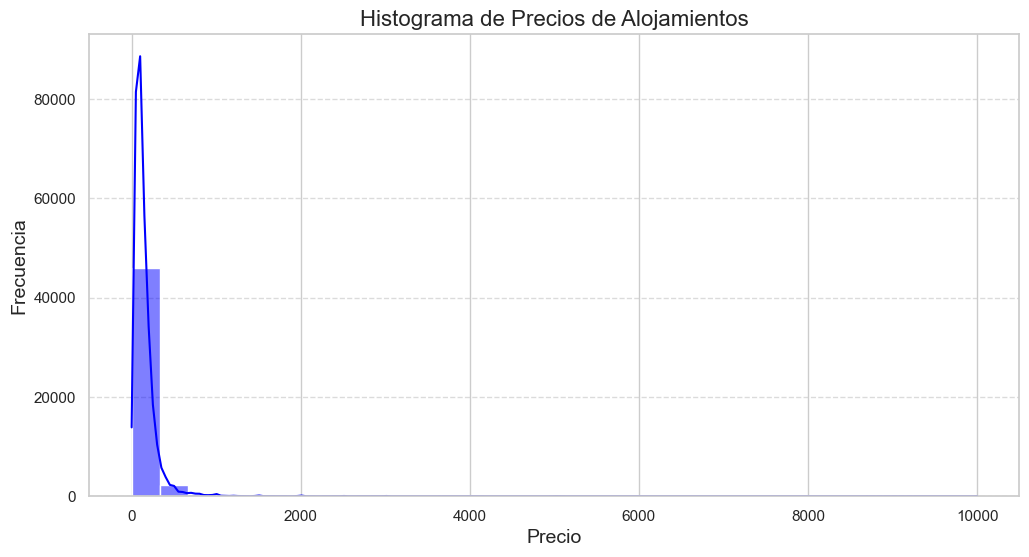

Precio mínimo: 0.0
Precio máximo: 10000.0
Precio promedio: 152.73213993453356

Media de precio por neighbourhood group:
neighbourhood_group
Bronx             87.464646
Brooklyn         124.391451
Manhattan        196.878654
Queens            99.536900
Staten Island    114.812332
Name: price, dtype: float64

Media de precio por tipo de habitación:
room_type
Entire home/apt    211.799677
Private room        89.784908
Shared room         70.127586
Name: price, dtype: float64


In [28]:
# Resolver acá Preprocesamiento
data_sin_duplicados = data.drop_duplicates()
columnas_a_eliminar = ['name', 'host_name', 'id', 'host_id'] 
data_sin_columnas = data_sin_duplicados.drop(columns=columnas_a_eliminar)

# Cálculo de estadísticas de precios
precio_minimo = data_sin_columnas['price'].min()
precio_maximo = data_sin_columnas['price'].max()
precio_promedio = data_sin_columnas['price'].mean()

# Media de precio por neighbourhood_group
media_precio_neighbourhood = data_sin_columnas.groupby('neighbourhood_group')['price'].mean()

# Media de precio por tipo de habitación
media_precio_tipo_habitacion = data_sin_columnas.groupby('room_type')['price'].mean()

# ----------------------
# Crear un histograma de los precios
plt.figure(figsize=(12, 6))
sns.histplot(data_sin_columnas['price'], bins=30, kde=True, color='blue')
plt.title('Histograma de Precios de Alojamientos', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar resultados
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")
print(f"Precio promedio: {precio_promedio}")
print("\nMedia de precio por neighbourhood group:")
print(media_precio_neighbourhood)
print("\nMedia de precio por tipo de habitación:")
print(media_precio_tipo_habitacion)


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

In [ ]:
# Resolver acá
#Crear dos scatter plots
plt.figure(figsize=(16, 6))  # Aumentar el tamaño total de la figura

# Primer scatter plot: Precio vs Mínimo de noches
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.scatterplot(data=data_sin_columnas, x='minimum_nights', y='price', 
                alpha=0.7, s=6, color='blue')  
plt.title("Precio vs Mínimo de Noches", fontsize=16)
plt.xlabel("Número Mínimo de Noches", fontsize=14)
plt.ylabel("Precio", fontsize=14)
plt.xlim(0, 30)  # Limitar el eje x para mejor visualización
plt.ylim(0, data_sin_columnas['price'].max() * 1.1)  # Limitar el eje y a un 10% más que el máximo

# Segundo scatter plot: Número de Reseñas vs Precio
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
sns.scatterplot(data=data_sin_columnas, x='number_of_reviews', y='price', 
                alpha=0.7, s=6, color='orange')  # s: tamaño de los puntos
plt.title("Precio vs Número de Reseñas", fontsize=16)
plt.xlabel("Número de Reseñas", fontsize=14)
plt.ylabel("Precio", fontsize=14)
plt.xlim(0, data_sin_columnas['number_of_reviews'].max() * 1.1)  # Limitar el eje x a un 10% más que el máximo
plt.ylim(0, data_sin_columnas['price'].max() * 1.1)  # Limitar el eje y a un 10% más para visualizar mejor

plt.tight_layout(pad=4.0)  # Ajustar el espacio entre subplots
plt.show()

: 

#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [ ]:
# Resolver acá
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_sin_columnas = data_sin_columnas.dropna(subset=columnas_cuantitativas)
data_normalizada = StandardScaler().fit_transform(data_sin_columnas[columnas_cuantitativas])

# Realizar PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(data_normalizada)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=componentes_principales, columns=['Componente 1', 'Componente 2'])

# Loadings
loadings = pd.DataFrame(pca.components_.T, 
                        index=columnas_cuantitativas, 
                        columns=['Componente 1', 'Componente 2'])

# Porcentaje de varianza explicada
varianza_explicada = pca.explained_variance_ratio_

#Graficar
plt.figure(figsize=(12, 8))  # Aumentar el tamaño de la figura
sns.set_style("whitegrid")  # Establecer el estilo del gráfico
sns.scatterplot(x='Componente 1', y='Componente 2', data=df_pca, alpha=0.7, s=100, color='blue')
plt.title('Análisis de Componentes Principales (PCA)', fontsize=20)
plt.xlabel('Componente Principal 1', fontsize=16)
plt.ylabel('Componente Principal 2', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


print("Varianza explicada:", varianza_explicada)
print(f'Porcentaje de varianza explicada por los dos componentes: {varianza_explicada.sum() * 100:.2f}%')
print(loadings)

: 

### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Resolver acá
import pandas as pd
from sklearn.model_selection import train_test_split

y = df_cuantitativo['price'] #definir variables  ##CHEQUEAR SI ES ESTE DF
X = df_cuantitativo.drop(columns=['price'])

# Se agrega la columna de unos para x
X = pd.concat([pd.Series(1, index=X.index, name='Intercepto'), X], axis=1)

# Se divide la base de datos en conjunto de entrenamiento y prueba (70 Y 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Verifica las dimensiones de los conjuntos
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

: 

#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [ ]:
#  Resolver acá
from sklearn.metrics import mean_squared_error, r2_score
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)  # Error Cuadrático Medio
r2 = r2_score(y_test, y_pred)  # R^2: Coeficiente de determinación

# Imprimir los resultados
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Error Cuadrático Medio (MSE):", mse)
print("R^2:", r2)

: 